In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

air = pd.read_csv('https://bit.ly/AirQFile')
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


#### 1. 결측치를 확인하시오.

In [12]:
air.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

#### 2. Month, Day 열을 삭제하시오.

In [13]:
air.drop(['Month', 'Day'], axis=1, inplace=True)
air

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56
...,...,...,...,...
148,30.0,193.0,6.9,70
149,NaN,145.0,13.2,77
150,14.0,191.0,14.3,75
151,18.0,131.0,8.0,76


#### 3. 결측치를 바로 앞 값으로 채우시오.

In [18]:
air['Ozone'].fillna(method='ffill', inplace=True)
air['Solar.R'].fillna(method='ffill', inplace=True)
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar.R  153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.9 KB


#### 4. Temp열의 기초통계량 사분위수를 q1,q2,q3 에 선언하시오.

In [20]:
q1 = air.describe().loc['25%','Temp']
q2 = air.describe().loc['50%','Temp']
q3 = air.describe().loc['75%','Temp']

print(q1)
print(q2)
print(q3)

72.0
79.0
85.0


#### 5. a~d 등급화 후 TempGrp 열을 추가하시오.

In [22]:
a = [-np.inf,q1,q2,q3,np.inf]
b = ['a','b','c','d']

air['TempGrp'] = pd.cut(air['Temp'], bins=a, labels=b)
air

,Ozone,Solar.R,Wind,Temp,TempGrp
0,41.0,190.0,7.4,67,a
1,36.0,118.0,8.0,72,a
2,12.0,149.0,12.6,74,b
3,18.0,313.0,11.5,62,a
4,18.0,313.0,14.3,56,a
...,...,...,...,...,...
148,30.0,193.0,6.9,70,a
149,30.0,145.0,13.2,77,b
150,14.0,191.0,14.3,75,b
151,18.0,131.0,8.0,76,b


#### 6. TempGrp 별 생존율 집계하여 tmp 데이터프레임 선언하시오.

In [25]:
tmp = air.groupby('TempGrp', as_index=False)[['Temp']].mean()
tmp

,TempGrp,Temp
0,a,64.948718
1,b,76.243902
2,c,82.205128
3,d,89.735294


#### 7. 막대그래프로 시각화하시오.

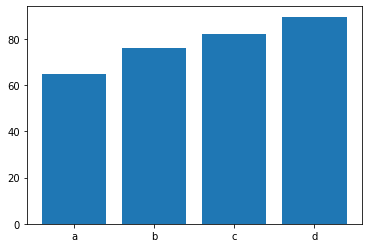

In [26]:
plt.bar(tmp['TempGrp'],tmp['Temp'])
plt.show()